## Desafìo Obtencion de Insights a partir de Visualizaciones

#### Para iniciar,  realizamos el cargue de las librerias que nos permitiran trabajar el proyecto en Python

In [1]:
## CARGAR LA lIBRERIAS

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
from sklearn.covariance import EmpiricalCovariance, MinCovDet

import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


# CONTEXTO COMERCIAL

La Institución educativa AAA School, es una institución de educacion internacional, que comercializa servicios de turismo para estudiantes de diferentes regiones que quieran hacer programas de formacion en sus instalaciones y a la vez conocer la ciudad y los principales sitios turisticos del pais en donde esta ubicada.

La institución cuenta con los registros en un aplicativo de inscripciones a un programa de inducción donde se presenta los beneficios de estudiar en este reconocido instituto, en este CRM han guardado la informacion de los estudiantes que han tomado los paquetes de programa de formacion y viaje con ellos.

una vez exportada esta información, se puede evidenciar que la data cuenta con datos de fechas de viaje, fechas de pago, fechas de inscripcion, tipo de programa, numero de matricula, nivel de ingresos, grado de los estudiantes actuales que van a tomar la inducción o los programas, fechas de reuniones con los padres de los estudiantes, entre otras caracteristicas, para lo cual adjuntamos el Dataset y sus caracteristicas.


### Llamamos el dataset que contiene la informacion relevante para el análisis.

In [ ]:
nueva_ruta = 'C:\Users\spcan\Downloads\desafios-Sandra-Patricia-Cano\Entrega_clase_38'

In [9]:
df=pd.read_csv('03 CSV data -- STC(A)_numerical dates .CSV')

### Identificamos los encabezados de las columnas para darnos una idea ordenada de que contiene el dataset.

In [49]:
df.head()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,T,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0


### Traemos la información consolidada de las columnas que nos permitira identificar: el nombre de cada columna, con el número de regisros en cada una y el tipo de dato si es porcentaje, numero entero, entre otros. en este ejemplo vemos que existen 56 columnas con 2388 registros las que mas datos tiene.

In [21]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2389 non-null   int64  
 1   Program.Code                    2389 non-null   object 
 2   From.Grade                      2262 non-null   float64
 3   To.Grade                        2239 non-null   float64
 4   Group.State                     2389 non-null   object 
 5   Is.Non.Annual.                  2389 non-null   int64  
 6   Days                            2389 non-null   int64  
 7   Travel.Type                     2389 non-null   object 
 8   Departure.Date                  2389 non-null   int64  
 9   Return.Date                     2389 non-null   int64  
 10  Deposit.Date                    2389 non-null   int64  
 11  Special.Pay                     470 non-null    object 
 12  Tuition                         23

### Posteriormente ejecutamos un describe, para conocer los promedios, el dato, mínimo, el máximo los cuartiles del dataset, que nos permitiran tomar decisiones para el análisis de los datos.

In [50]:
df.describe()

,ID,From.Grade,To.Grade,Is.Non.Annual.,Days,Departure.Date,Return.Date,Deposit.Date,Tuition,FRP.Active,...,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,2389.000000,2262.000000,2239.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,...,2389.000000,2052.000000,2052.000000,2052.000000,2052.000000,2389.000000,2298.000000,2389.000000,2389.000000,2389.000000
mean,1195.000000,7.268347,7.912908,0.154039,4.575136,40670.764337,40674.498535,40475.821264,1615.217664,16.867727,...,1.102135,40408.495614,40441.601365,262.083821,228.978070,0.556718,0.066184,0.900667,2.953537,0.607367
std,689.789219,1.388350,1.558226,0.361062,1.432128,35.217643,35.243691,37.906251,645.096047,16.942782,...,0.611544,72.393761,43.666436,79.520208,53.636014,0.496877,0.081112,0.049119,2.876422,0.488439
min,1.000000,3.000000,3.000000,0.000000,1.000000,40557.000000,40557.000000,40081.000000,79.000000,0.000000,...,0.000000,39945.000000,39945.000000,-204.000000,-204.000000,0.000000,0.000922,0.600000,0.000000,0.000000
25%,598.000000,7.000000,8.000000,0.000000,4.000000,40642.000000,40645.000000,40466.000000,1174.000000,6.000000,...,1.000000,40404.250000,40429.000000,208.000000,196.750000,0.000000,0.020787,0.882353,1.000000,0.000000
50%,1195.000000,8.000000,8.000000,0.000000,5.000000,40680.000000,40683.000000,40479.000000,1700.000000,12.000000,...,1.000000,40435.000000,40442.000000,250.000000,233.000000,1.000000,0.045256,0.909091,2.000000,1.000000
75%,1792.000000,8.000000,8.000000,0.000000,5.000000,40701.000000,40704.000000,40487.000000,2048.000000,23.000000,...,1.000000,40449.000000,40451.000000,287.000000,261.000000,1.000000,0.087517,0.933333,4.000000,1.000000
max,2389.000000,12.000000,12.000000,1.000000,12.000000,40724.000000,40729.000000,40846.000000,4200.000000,257.000000,...,2.000000,40821.000000,40821.000000,749.000000,749.000000,1.000000,2.052632,1.000000,47.000000,1.000000


### Con el ánimo de ver si tenemos registros duplicados, contamos los valores que presentan esta caracteristica y asi, definimos si hay que remediar o no esta situación. 

In [51]:
df.duplicated().value_counts()

False    2389
dtype: int64

### En este caso no tuvimos registros duplicados.

## Gráfico Bivariada Barplot


### Teniendo en cuenta el tipo de viaje que realizan los estudiantes, se quiere evidenciar con un  gráfico el número promedio de días de alojamiento que toman en su paquete para la induccion.

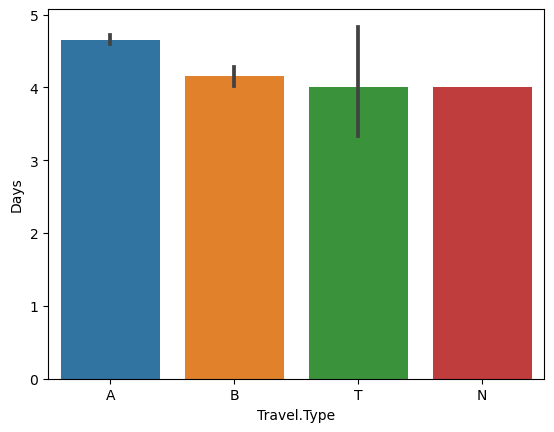

In [52]:
sns.barplot(data = df,
           x = 'Travel.Type',
           y = 'Days')

plt.gca().yaxis.set_major_formatter('{:.0f}'.format)  # No Mostrar 2 decimales en el eje y

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))  # Mostrar formato numérico con puntos en el eje y


## Gráfico Univariada_Histograma

### vemos interesante tambien ir analizando que tipo de paquete toman los estudiantes, cual es el de mayor frecuencia y asi, ir determinanado si hay o no una preferencia notable


([0, 1, 2, 3],
 [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'T'), Text(3, 0, 'N')])

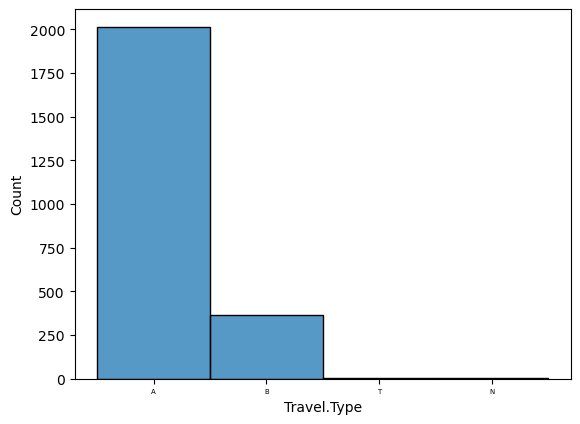

In [53]:
plt.figure()
sns.histplot(data = df,
                x = 'Travel.Type')
plt.xticks(fontsize=5)



### En este caso los estudiantes que asisten a la institución toman el paquete tipo A, con todo incluido en su gran mayorìa, esto es entendible, porque la mayoria son de estados diferentes a donde esta la universidad y desean garantizar que tiene todo cubierto.

## FEATURES CATEGORICAS

In [54]:
features_categoricas = df.select_dtypes(include=['object'])
features_categoricas.columns

Index(['Program.Code', 'Group.State', 'Travel.Type', 'Special.Pay',
       'Poverty.Code', 'Region', 'School.Type', 'MDR.Low.Grade',
       'Income.Level', 'SPR.Product.Type', 'SPR.New.Existing',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType',
       'DepartureMonth', 'GroupGradeTypeLow', 'GroupGradeTypeHigh',
       'GroupGradeType', 'MajorProgramCode', 'SchoolSizeIndicator'],
      dtype='object')

### Definimos cuántos valores distintos tiene cada categoría?

In [55]:
valores_distintos = features_categoricas.nunique()
print(valores_distintos.sort_values(ascending=False))

Group.State            54
Program.Code           28
Income.Level           22
GroupGradeType         13
MDR.Low.Grade          12
SchoolGradeType         9
Poverty.Code            6
Region                  6
SPR.Product.Type        6
GroupGradeTypeLow       6
DepartureMonth          6
MajorProgramCode        4
GroupGradeTypeHigh      4
SchoolSizeIndicator     4
SchoolGradeTypeHigh     4
SchoolGradeTypeLow      4
School.Type             4
Travel.Type             4
Special.Pay             3
SPR.New.Existing        2
dtype: int64


###  Hacemos la selección de las variables categoricas que vamos a trabajar

In [56]:
col_aTransformar = valores_distintos.index[valores_distintos<=4]
col_aTransformar

Index(['Travel.Type', 'Special.Pay', 'School.Type', 'SPR.New.Existing',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'GroupGradeTypeHigh',
       'MajorProgramCode', 'SchoolSizeIndicator'],
      dtype='object')

### Patra transformarlas, vamos a usar el método get_dummies de pandas, de esta manera las podemos usar en el dataset ya convertidas en unos y ceros, así: 

In [57]:
df_dummies = pd.get_dummies(df[col_aTransformar],drop_first=True)
df_dummies.head()

,Travel.Type_B,Travel.Type_N,Travel.Type_T,Special.Pay_FR,Special.Pay_SA,School.Type_Catholic,School.Type_PUBLIC,School.Type_Private non-Christian,SPR.New.Existing_NEW,SchoolGradeTypeLow_High,...,SchoolGradeTypeHigh_Undefined,GroupGradeTypeHigh_High,GroupGradeTypeHigh_Middle,GroupGradeTypeHigh_Undefined,MajorProgramCode_H,MajorProgramCode_I,MajorProgramCode_S,SchoolSizeIndicator_M-L,SchoolSizeIndicator_S,SchoolSizeIndicator_S-M
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


# CONTEXTO ANALITICO

Para este análisis, se cuenta con la base de datos de las inscripciones del año anterior.

La información contiene las fechas en que fueron registrados los estudiantes, si estos tomaron el paquete de viaje o no, tambien si los estudiantes cuentan con los ingresos familiares no solo que les permita costear el programa inicial sino, matricularse en programas adicionales con la institución. 

# PROBLEMATICA
El departamento de marketing de la institución requiere, conocer los principales estudiantes que se matriculan en sus programas y si renuevan matricula para tomar nuevos cursos al año siguiente, por otra parte requieren conocer de donde provienen los alumnos  frecuentes y en que estados se deberia hacer mayor promocion de su oferta academica, para lograr la consecusion de mayores programas contratados.



# OBJETIVO
El Departamento de marketing podra con esta información, realizar una estrategia de mercadeo mas eficiente y focalizada, que les permita orientarse a los estudiantes con la capacidad de tomar no solo uno sino varios programas en la institución, reteniendo a los estudiantes objetivo.

###  Continuamos limpiando la data y validando otras variables categoricas que nos impactan.

In [58]:
df['From.Grade'] = df['From.Grade'].astype('category')
df['To.Grade'] = df['To.Grade'].astype('category')
df['Is.Non.Annual.'] = df['Is.Non.Annual.'].astype('category')
df['Parent.Meeting.Flag'] = df['Parent.Meeting.Flag'].astype('category')
df['Days'] = df['Days'].astype('category')
df['CRM.Segment'] = df['CRM.Segment'].astype('category')
df['MDR.High.Grade'] = df['MDR.High.Grade'].astype('category')
df['School.Sponsor'] = df['School.Sponsor'].astype('category')
df['NumberOfMeetingswithParents'] = df['CRM.Segment'].astype('category')
df['SingleGradeTripFlag'] = df['SingleGradeTripFlag'].astype('category')
df.info()

# se encontraron 10 variables que no estaban clasificadas correctamente, por lo cual las convertimos en tipo Categoricas.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              2389 non-null   int64   
 1   Program.Code                    2389 non-null   object  
 2   From.Grade                      2262 non-null   category
 3   To.Grade                        2239 non-null   category
 4   Group.State                     2389 non-null   object  
 5   Is.Non.Annual.                  2389 non-null   category
 6   Days                            2389 non-null   category
 7   Travel.Type                     2389 non-null   object  
 8   Departure.Date                  2389 non-null   int64   
 9   Return.Date                     2389 non-null   int64   
 10  Deposit.Date                    2389 non-null   int64   
 11  Special.Pay                     470 non-null    object  
 12  Tuition             

### podemos observar que la mayoria de los estudiantes vienen del estado de California, y corresponde al 30% de los inscritos, seguido de Texas con un  12% el cual representa el 42% de nuestros registros.

In [59]:
df['Group.State'].value_counts() 

CA                718
TX                308
WA                147
IL                104
CO                 89
MI                 71
FL                 62
AZ                 53
OH                 53
MN                 51
OR                 51
WI                 46
IN                 43
MO                 43
NE                 42
TN                 38
MA                 36
IA                 35
OK                 33
LA                 31
KS                 26
GA                 22
AL                 21
NV                 20
NM                 20
NY                 19
VA                 18
KY                 16
NC                 16
MD                 15
CT                 15
ID                 14
SD                 11
AR                 10
SC                 10
HI                  9
MS                  9
UT                  9
ME                  7
NH                  7
MT                  6
NJ                  6
AK                  5
PA                  5
ND                  5
RI        

In [64]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

In [65]:
CombineRareCategories(df, 10)  

In [66]:
df[0:10]

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,Other_Travel.Type,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0
5,6,HC,10.0,12.0,LA,0,4,A,40560,40563,...,High,High,High->High,H,0,0.010650,0.909091,1,L,1
6,7,SG,11.0,12.0,MA,1,6,A,40561,40566,...,High,High,High->High,S,0,0.111111,0.925926,2,S,0
7,8,Other_Program.Code,9.0,9.0,Other_Group.State,0,8,A,40567,40574,...,Undefined,Undefined,Undefined->Undefined,I,1,NaN,0.928571,1,NaN,0
8,9,CC,8.0,8.0,AZ,0,8,A,40572,40579,...,Middle,High,Middle->High,C,1,0.104000,0.928571,4,S-M,1
9,10,HD,8.0,8.0,TX,0,4,A,40581,40584,...,PK,Middle,PK->Middle,H,1,0.103937,0.916667,6,M-L,1


### REMPLAZO O IMPUTO DATOS FALTANTES

In [67]:
pd.DataFrame(df).isna().sum() 

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

In [68]:
for col in df:
    if df[col].isna().sum() != 0: 
        df[col + '_surrogate'] = df[col].isna().astype(int)


### Encontramos 17 columnas con valores nulos, lo cual nos indica que debemos hacer imputacion de estos datos, a traves de los promedios de los mismos.

In [69]:
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer.fit(df.select_dtypes(exclude=['int64','float64']))
df[df.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(df.select_dtypes(exclude=['int64','float64']))

In [70]:
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df.select_dtypes(include=['int64','float64']))
df[df.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df.select_dtypes(include=['int64','float64']))


In [71]:
df[['Poverty.Code','Poverty.Code_surrogate']]


,Poverty.Code,Poverty.Code_surrogate
0,B,0
1,C,0
2,C,0
3,missing_value,1
4,D,0
...,...,...
2384,C,0
2385,C,0
2386,missing_value,1
2387,missing_value,1


### identificamos que a las variables cualitativas no se les puede aplicar el promedio, en este caso usariamos la moda de ser necesario.

In [72]:
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

In [73]:
pd.options.display.max_columns = None 

In [74]:
df.head()

,ID,Departure.Date,Return.Date,Deposit.Date,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Total.School.Enrollment,EZ.Pay.Take.Up.Rate,FPP,Total.Pax,SPR.Group.Revenue,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.,Program.Code_CD,Program.Code_HC,Program.Code_HD,Program.Code_HG,Program.Code_HN,Program.Code_HO,Program.Code_HS,Program.Code_HVP,Program.Code_IC,Program.Code_Other_Program.Code,Program.Code_SC,Program.Code_SG,Program.Code_SK,Program.Code_SM,Program.Code_ST,From.Grade_4.0,From.Grade_5.0,From.Grade_6.0,From.Grade_7.0,From.Grade_8.0,From.Grade_9.0,From.Grade_10.0,From.Grade_11.0,From.Grade_12.0,From.Grade_missing_value,To.Grade_4.0,To.Grade_5.0,To.Grade_6.0,To.Grade_7.0,To.Grade_8.0,To.Grade_9.0,To.Grade_10.0,To.Grade_11.0,To.Grade_12.0,To.Grade_missing_value,Group.State_AR,Group.State_AZ,Group.State_CA,Group.State_CO,Group.State_CT,Group.State_FL,Group.State_GA,Group.State_IA,Group.State_ID,Group.State_IL,Group.State_IN,Group.State_KS,Group.State_KY,Group.State_LA,Group.State_MA,Group.State_MD,Group.State_MI,Group.State_MN,Group.State_MO,Group.State_NC,Group.State_NE,Group.State_NM,Group.State_NV,Group.State_NY,Group.State_OH,Group.State_OK,Group.State_OR,Group.State_Other_Group.State,Group.State_SC,Group.State_SD,Group.State_TN,Group.State_TX,Group.State_VA,Group.State_WA,Group.State_WI,Is.Non.Annual._1,Days_2,Days_3,Days_4,Days_5,Days_6,Days_7,Days_8,Days_9,Days_10,Days_11,Days_12,Travel.Type_B,Travel.Type_Other_Travel.Type,Special.Pay_FR,Special.Pay_SA,Special.Pay_missing_value,Poverty.Code_B,Poverty.Code_C,Poverty.Code_D,Poverty.Code_E,Poverty.Code_Other_Poverty.Code,Poverty.Code_missing_value,Region_Houston,Region_Northern California,Region_Other,Region_Pacific Northwest,Region_Southern California,CRM.Segment_2.0,CRM.Segment_3.0,CRM.Segment_4.0,CRM.Segment_5.0,CRM.Segment_6.0,CRM.Segment_7.0,CRM.Segment_8.0,CRM.Segment_9.0,CRM.Segment_10.0,CRM.Segment_11.0,CRM.Segment_missing_value,School.Type_Catholic,School.Type_PUBLIC,School.Type_Private non-Christian,Parent.Meeting.Flag_1,MDR.Low.Grade_4,MDR.Low.Grade_5,MDR.Low.Grade_6,MDR.Low.Grade_7,MDR.Low.Grade_8,MDR.Low.Grade_9,MDR.Low.Grade_K,MDR.Low.Grade_Other_MDR.Low.Grade,MDR.Low.Grade_PK,MDR.Low.Grade_missing_value,MDR.High.Grade_2.0,MDR.High.Grade_3.0,MDR.High.Grade_4.0,MDR.High.Grade_5.0,MDR.High.Grade_6.0,MDR.High.Grade_7.0,MDR.High.Grade_8.0,MDR.High.Grade_9.0,MDR.High.Grade_10.0,MDR.High.Grade_11.0,MDR.High.Grade_12.0,MDR.High.Grade_missing_value,Income.Level_B,Income.Level_C,Income.Level_D,Income.Level_E,Income.Level_F,Income.Level_G,Income.Level_H,Income.Level_I,Income.Level_J,Income.Level_K,Income.Level_L,Income.Level_M,Income.Level_N,Income.Level_O,Income.Level_Other_Income.Level,Income.Level_P,Income.Level_Q,Income.Level_Z,Income.Level_missing_value,School.Sponsor_1,SPR.Product.Type_Costa Rica,SPR.Product.Type_East Coast,SPR.Product.Type_International,SPR.Product.Type_Other_SPR.Product.Type,SPR.Product.Type_Science,SPR.New.Existing_NEW,NumberOfMeetingswithParents_2.0,NumberOfMeetingswithParents_3.0,NumberOfMeetingswithParents_4.0,NumberOfMeetingswithParents_5.0,NumberOfMeetingswithParents_6.0,NumberOfMeetingswithParents_7.0,NumberOfMeetingswithParents_8.0,NumberOfMeetingswithParents_9.0,NumberOfMeetingswithParents_10.0,NumberOfMeetingswithParents_11.0,NumberOfMeetingswithParents_missing_value,SchoolGradeTypeLow_High,SchoolGradeTypeLow_Middle,SchoolGradeTypeLow_Undefined,SchoolGradeTypeHigh_High,SchoolGradeTypeHigh_Middle,SchoolGradeTypeHigh_Undefined,SchoolGradeType_Elementary->Middle,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolGradeType_Middle->Undefined,SchoolGradeType_Other_SchoolGradeType,SchoolGradeType_Undefined->Undefined,DepartureMonth_February,DepartureMonth_June,DepartureMonth_March,DepartureMonth_May,Departu

In [75]:
variable_Ingresos = df['SPR.Group.Revenue']
variable_Ingresos.describe()

count    2389.000000
mean     1615.217664
std       645.096047
min        79.000000
25%      1174.000000
50%      1700.000000
75%      2048.000000
max      4200.000000
Name: SPR.Group.Revenue, dtype: float64

(0.0, 7000.0)

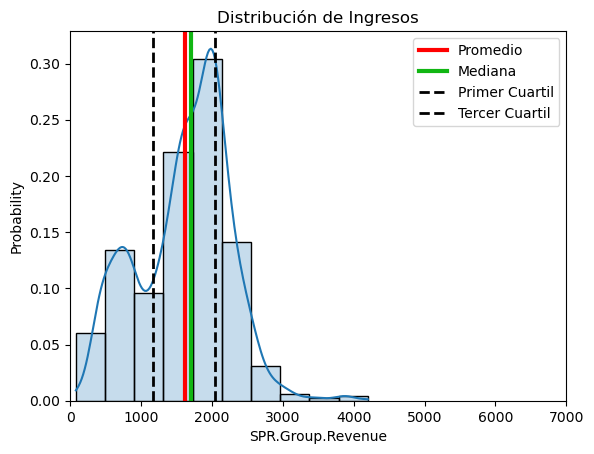

In [76]:
# Histograma variable 
# Primero calculo algunas medidas que quiero presentar 
media = variable_Ingresos.mean()
mediana = variable_Ingresos.median()
primer_cuartil = variable_Ingresos.quantile(0.25)
tercer_cuartil = variable_Ingresos.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SPR.Group.Revenue',
             bins = 10,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red',
             linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de Ingresos')

ax = plt.gca()

plt.xlim(0, 7000)
           


(0.0, 0.3)

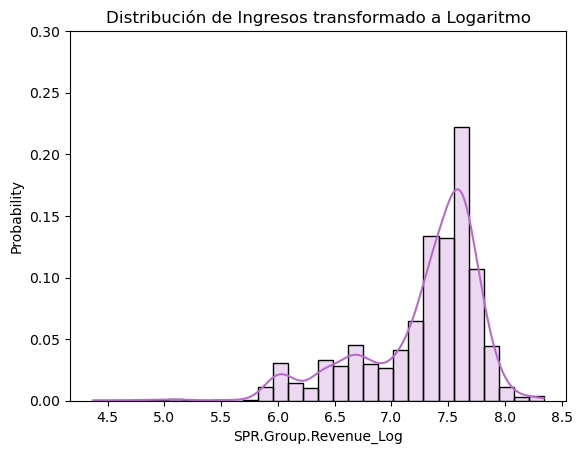

In [84]:
# Genero la variable logaritmica # Genero la variable logaritmica 
df['SPR.Group.Revenue_Log'] = np.log(df['SPR.Group.Revenue'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data= df,
             x = 'SPR.Group.Revenue_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de Ingresos transformado a Logaritmo')

plt.ylim(0, 0.3)

In [80]:
## DEFINIR LA VARIABE TARGET Y LAS FEATURES

## PREGUNTAS DE INTERÉS
Podemos predecir la cantidad de estudiantes que se van a mantener en la institucion en el futuro?
Podemos saber cual es el estado en donde mas participacion de estudantes tenemos matriculados en el instituto?
Podemos saber el tipo de viaje que toman los estudiantes que estan matriculados en la institucion.

## OBJETIVO:
Predecir la probabilidad de que los estudiantes matriculados en el 2011 permanezcan durante el siguiente año en nuevos programas dentro de la institucion.

## VARIABLE TARGET:
Retained.in.2012

In [87]:
df["Retained.in.2012."].value_counts()

1.0    1451
0.0     938
Name: Retained.in.2012., dtype: int64

 Identificamos que la mayoria de los estudiantes del 2011 se retuvieron en el año 2012, asi que debemos realizar un trabajo de profundizacion y promocion para los estados en donde los estudiantes no estan matriculandose en nuevos programas

In [88]:
# Calculo matriz de correlación 
matriz_correlacion = df.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['Retained.in.2012.']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['Retained.in.2012.', 'Retained.in.2012.']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

##generamos la matriz de correlaciones para identificar la dependencia de las variables

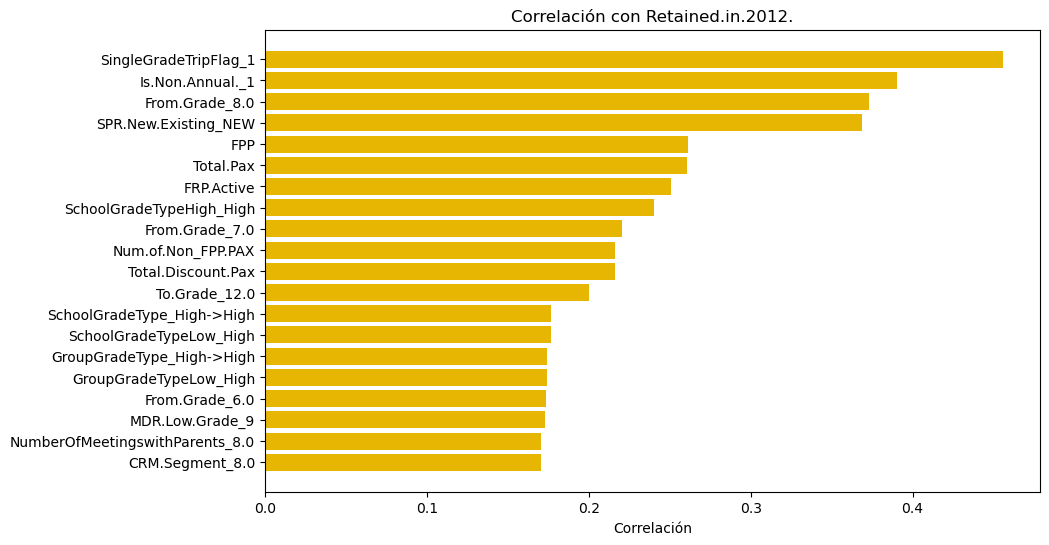

In [89]:
# Grafico el top 12 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#E7B602')
plt.xlabel('Correlación')
plt.title('Correlación con Retained.in.2012.')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

## Para el modelo que vamos a usar, debemos realizar dos metodos de limpieza de la información:

### 1. Variables que no generan informacion, como lo son el ID, Program.Code, entre otras
### 2. Las variables mas correlacionadas con la variable target,como: single.grade.trip.flat, IsNonAnnual, FFPP, entre otras

In [90]:
# Elijo el top 10 de variables más correlacionadas con el target
features_selec = matriz_correlacion_target.index[0:10]
features_selec

Index(['SingleGradeTripFlag_1', 'Is.Non.Annual._1', 'From.Grade_8.0',
       'SPR.New.Existing_NEW', 'FPP', 'Total.Pax', 'FRP.Active',
       'SchoolGradeTypeHigh_High', 'From.Grade_7.0', 'Num.of.Non_FPP.PAX'],
      dtype='object')

<Axes: >

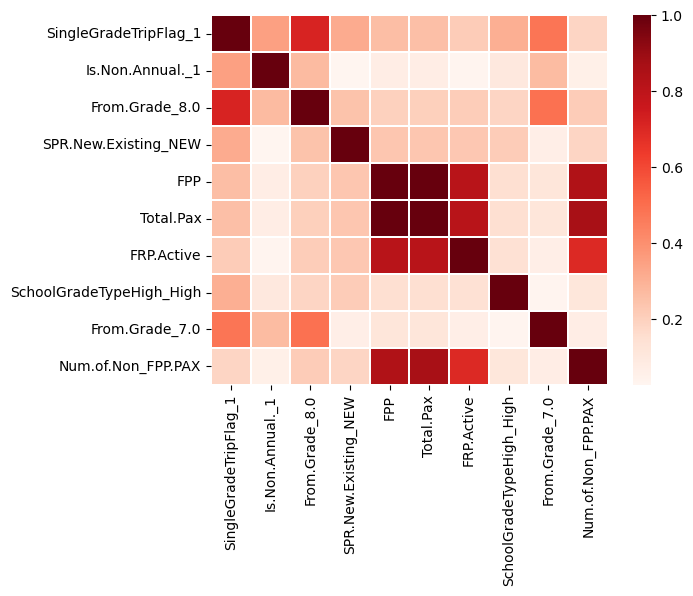

In [91]:
matriz_correlacion = df[features_selec].corr(method='pearson')
sns.heatmap(abs(matriz_correlacion),
           #cbar=False,
           linewidths = 0.3,
           cmap = 'Reds')

### Para Analizar las variables correlacionadas, se crearon 2 formas de visualizacion, como lo son: 
### 1. grafica de barras
### 2. correlograma

## MODELOS

In [92]:
y = df['Retained.in.2012.']
X = df.drop(columns = 'Retained.in.2012.')

In [93]:
y.describe()

count    2389.000000
mean        0.607367
std         0.488439
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Retained.in.2012., dtype: float64

In [ ]:
#SE CREAN LAS x Y y PARA PODER PARTIR LOS DATOS EN 80% TRAIN Y UN 20% TEST

In [94]:
X

,ID,Departure.Date,Return.Date,Deposit.Date,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Total.School.Enrollment,EZ.Pay.Take.Up.Rate,FPP,Total.Pax,SPR.Group.Revenue,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Program.Code_CD,Program.Code_HC,Program.Code_HD,Program.Code_HG,Program.Code_HN,Program.Code_HO,Program.Code_HS,Program.Code_HVP,Program.Code_IC,Program.Code_Other_Program.Code,Program.Code_SC,Program.Code_SG,Program.Code_SK,Program.Code_SM,Program.Code_ST,From.Grade_4.0,From.Grade_5.0,From.Grade_6.0,From.Grade_7.0,From.Grade_8.0,From.Grade_9.0,From.Grade_10.0,From.Grade_11.0,From.Grade_12.0,From.Grade_missing_value,To.Grade_4.0,To.Grade_5.0,To.Grade_6.0,To.Grade_7.0,To.Grade_8.0,To.Grade_9.0,To.Grade_10.0,To.Grade_11.0,To.Grade_12.0,To.Grade_missing_value,Group.State_AR,Group.State_AZ,Group.State_CA,Group.State_CO,Group.State_CT,Group.State_FL,Group.State_GA,Group.State_IA,Group.State_ID,Group.State_IL,Group.State_IN,Group.State_KS,Group.State_KY,Group.State_LA,Group.State_MA,Group.State_MD,Group.State_MI,Group.State_MN,Group.State_MO,Group.State_NC,Group.State_NE,Group.State_NM,Group.State_NV,Group.State_NY,Group.State_OH,Group.State_OK,Group.State_OR,Group.State_Other_Group.State,Group.State_SC,Group.State_SD,Group.State_TN,Group.State_TX,Group.State_VA,Group.State_WA,Group.State_WI,Is.Non.Annual._1,Days_2,Days_3,Days_4,Days_5,Days_6,Days_7,Days_8,Days_9,Days_10,Days_11,Days_12,Travel.Type_B,Travel.Type_Other_Travel.Type,Special.Pay_FR,Special.Pay_SA,Special.Pay_missing_value,Poverty.Code_B,Poverty.Code_C,Poverty.Code_D,Poverty.Code_E,Poverty.Code_Other_Poverty.Code,Poverty.Code_missing_value,Region_Houston,Region_Northern California,Region_Other,Region_Pacific Northwest,Region_Southern California,CRM.Segment_2.0,CRM.Segment_3.0,CRM.Segment_4.0,CRM.Segment_5.0,CRM.Segment_6.0,CRM.Segment_7.0,CRM.Segment_8.0,CRM.Segment_9.0,CRM.Segment_10.0,CRM.Segment_11.0,CRM.Segment_missing_value,School.Type_Catholic,School.Type_PUBLIC,School.Type_Private non-Christian,Parent.Meeting.Flag_1,MDR.Low.Grade_4,MDR.Low.Grade_5,MDR.Low.Grade_6,MDR.Low.Grade_7,MDR.Low.Grade_8,MDR.Low.Grade_9,MDR.Low.Grade_K,MDR.Low.Grade_Other_MDR.Low.Grade,MDR.Low.Grade_PK,MDR.Low.Grade_missing_value,MDR.High.Grade_2.0,MDR.High.Grade_3.0,MDR.High.Grade_4.0,MDR.High.Grade_5.0,MDR.High.Grade_6.0,MDR.High.Grade_7.0,MDR.High.Grade_8.0,MDR.High.Grade_9.0,MDR.High.Grade_10.0,MDR.High.Grade_11.0,MDR.High.Grade_12.0,MDR.High.Grade_missing_value,Income.Level_B,Income.Level_C,Income.Level_D,Income.Level_E,Income.Level_F,Income.Level_G,Income.Level_H,Income.Level_I,Income.Level_J,Income.Level_K,Income.Level_L,Income.Level_M,Income.Level_N,Income.Level_O,Income.Level_Other_Income.Level,Income.Level_P,Income.Level_Q,Income.Level_Z,Income.Level_missing_value,School.Sponsor_1,SPR.Product.Type_Costa Rica,SPR.Product.Type_East Coast,SPR.Product.Type_International,SPR.Product.Type_Other_SPR.Product.Type,SPR.Product.Type_Science,SPR.New.Existing_NEW,NumberOfMeetingswithParents_2.0,NumberOfMeetingswithParents_3.0,NumberOfMeetingswithParents_4.0,NumberOfMeetingswithParents_5.0,NumberOfMeetingswithParents_6.0,NumberOfMeetingswithParents_7.0,NumberOfMeetingswithParents_8.0,NumberOfMeetingswithParents_9.0,NumberOfMeetingswithParents_10.0,NumberOfMeetingswithParents_11.0,NumberOfMeetingswithParents_missing_value,SchoolGradeTypeLow_High,SchoolGradeTypeLow_Middle,SchoolGradeTypeLow_Undefined,SchoolGradeTypeHigh_High,SchoolGradeTypeHigh_Middle,SchoolGradeTypeHigh_Undefined,SchoolGradeType_Elementary->Middle,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolGradeType_Middle->Undefined,SchoolGradeType_Other_SchoolGradeType,SchoolGradeType_Undefined->Undefined,DepartureMonth_February,DepartureMonth_June,DepartureMonth_March,DepartureMonth_May,DepartureMonth_Other_Depa

In [95]:
## ESTABLECER VALOR INICIAL SEMILLA PARA GENERAR NUMEROS ALEATORIOS
np.random.seed(77300)

In [96]:
## DIVIDO EL DATA SET EN TRAIN 80% Y TEST EL 20%, DE MANERA ESTRATIFICADA PARA QUE LA PROPORCION DE CLIENTES RETENIDOS Y NO RETENIDOS SEA LA MISMA EN AMBOS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)


In [97]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1911, 262)
(478, 262)
(1911,)
(478,)


# CALCULAR METRICAS DEL MODELO

###  ROC CURVE

In [98]:

## Defino la función que me va a permitir ver las metricas a tarves de la curva ROC

def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

### MATRIX DE CONSFUSION

In [99]:

# Se define las metricas para analizar la Matriz de confusión

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))


# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))


# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))


# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))


# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

## SVM

In [100]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # scale the data
svm_estimators.append(('svm', svm.SVC(probability=True))) # define SVM with probabilities (recall, SVM be default does not predict probabilities)
     
# Define the support vectors machine model and call it classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_SVM.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('svm', SVC(probability=True))])

### USAMOS EL 60.73% QUE ES EL PROMEDIO DE PROBABILIDAD DE RETENCION EN ESTA DATA 

Metrics of the Support Vector Machines model: 

Confusion matrix: 
[[147  62]
 [ 41 228]]
                                   Accuracy: 0.7845188284518828
                   SENSITIVITY (aka RECALL): 0.7862068965517242
                 SPECIFICITY (aka FALL-OUT): 0.7819148936170213
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8475836431226765
                 NEGATIVE PREDICTIVE VALUE): 0.7033492822966507


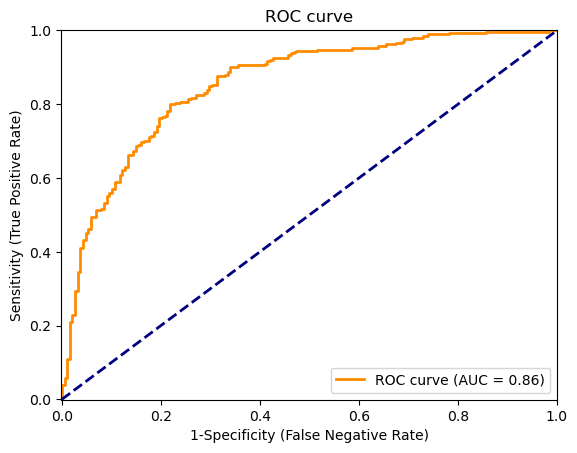

 AUC: 0.8557226705796038


In [101]:
class_threshold = 0.6073

## USAMOS MODELO AJUSTADO PARA PREDECIR LOS DATOS DE PRUEBA
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # PROBABILIDAD
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # CLASIFICACION


print('Metrics of the Support Vector Machines model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Analizando los datos de los estudiantes que no se retuvieron en el año 2012, se predice que: El área bajo la Curva de ROC, podemos identificar que tenemos un 86%, que significa la combinacion del nivel de precision (falsos positivos) contra los verdaderos positivos que corresponde a la exashustividad.  Lo anterior identifica a los estudiantes que no se van a retener en el año siguiente y tendriamos que aceptar el 14% de los falsos positivos, haciendo una estrategia de retención sobre estos estudiantes.

In [ ]:
Este código utiliza la función roc_curve para calcular las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) y luego utiliza la función plot_roc para visualizar la curva ROC. La variable y_pred_proba contiene las probabilidades predichas por el modelo para la clase positiva.

La curva ROC y el área bajo la curva (AUC) proporcionan información sobre el rendimiento del modelo en términos de sensibilidad y especificidad. Una AUC cercana a 1 indica un buen rendimiento.

interpretación de las métricas del modelo de Máquinas de Vectores de Soporte (Support Vector Machines, SVM) basado en la matriz de confusión y las métricas proporcionadas:

Matriz de Confusión:

Verdaderos positivos (TP): 228
Verdaderos negativos (TN): 147
Falsos positivos (FP): 62
Falsos negativos (FN): 41
Accuracy (Exactitud):

Exactitud = (TP + TN) / (TP + TN + FP + FN)
Accuracy: 0.7845 (o 78.45%)
Sensibilidad (Recall):

Sensibilidad = TP / (TP + FN)
Sensibilidad: 0.7862 (o 78.62%)
También conocido como Recall o True Positive Rate.
Especificidad (Fall-out):

Especificidad = TN / (TN + FP)
Especificidad: 0.7819 (o 78.19%)
Mide la capacidad del modelo para evitar falsos positivos.
Valor Predictivo Positivo (Precisión):

Precisión = TP / (TP + FP)
Precisión: 0.8476 (o 84.76%)
Proporción de casos positivos predichos correctamente entre todos los casos positivos predichos.
Valor Predictivo Negativo:

Negativo Predictivo Valor = TN / (TN + FN)
Valor Predictivo Negativo: 0.7033 (o 70.33%)
Proporción de casos negativos predichos correctamente entre todos los casos negativos predichos.